<a href="https://colab.research.google.com/github/kfgarrity/python_wan_code/blob/master/python_wan_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#optional
#from google.colab import drive
#drive.mount('/content/gdrive')


Get the repository

In [1]:
! git clone https://github.com/kfgarrity/python_wan_code.git

Cloning into 'python_wan_code'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 57 (delta 9), reused 53 (delta 8), pack-reused 0
Unpacking objects: 100% (57/57), done.
Checking out files: 100% (46/46), done.


In [2]:
! ls
%cd python_wan_code/
! pwd

python_wan_code  sample_data
/content/python_wan_code
/content/python_wan_code


Unzip files we need.

In [3]:
! gunzip */*/*gz

These should already be installed, but we can double check.

In [ ]:
! pip install numpy 
! pip install scipy
! pip install matplotlib

Prepare our file structure.

In [4]:
% cd example_tate4
! ln -s ../*py ./
! ls

/content/python_wan_code/example_tate4
example.py  nbte4_relaxed  reference	      tate4_relaxed
ham_ops.py  qe.in	   tate4_expt_coords  wan_ham.py


Here is the beginning of the example. It loads the libraries and the wannier hamiltonian.

In [5]:
import numpy as np

from wan_ham import wan_ham
from ham_ops import ham_ops

#matplotlib.use('Agg')  #for turning off display and only using pdf or png output                                                                                                                                                                                    
import matplotlib.pyplot as plt
import  sys

ops = ham_ops()

h = wan_ham('tate4_relaxed/qe_hr.dat') #load the hamiltonian                                                                                                                                                                                                     
nstr = "tate4_relaxed"
fermi = 11.9540 # tate4 relaxed                                                                                                                                                                                                                                  
orbital_info = [["Ta", 2, ["d"]], ["Te", 8, ["p"]]] #ta case                                                                                                                                                                                                     
orbs_metal = ops.get_orbitals(orbital_info, [["Ta"]], so=True)
orbs_te = ops.get_orbitals(orbital_info, [["Te"]], so=True)




ham_ops
initializing wan_ham

 written on 11Dec2021 at 07:23:45 

147 2197
loaded  tate4_relaxed/qe_hr.dat
nwan:  68
nr:    2197

H size 13 13 13 68 68
done reshaping1
get_orbs  True
[['Ta', 2, ['d']], ['Te', 8, ['p']]]
nwan =  68
get_orbs  True
[['Ta', 2, ['d']], ['Te', 8, ['p']]]
nwan =  68


In [9]:
h.trim(val=1e-4) # trim the longer range terms in the hamiltonian, to make calculations faster

trimmed 1427 1427


Here is some code to make a simple band structure plot

nktot 221

kpoint name_info
[[0, '$\\Gamma$'], [20, 'X'], [40, 'M'], [60, '$\\Gamma$'], [80, 'Z'], [100, 'R'], [120, 'A'], [140, 'Z'], [160, 'X'], [180, 'R'], [200, 'M'], [220, 'A']]



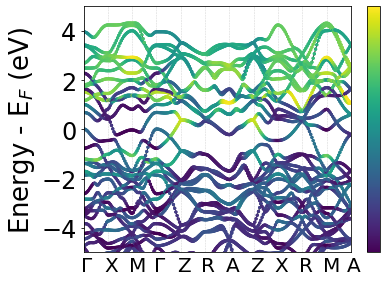

In [23]:
d = {}
d["A"] = [0.5000000000, 0.5000000000,0.5000000000]
d["$\Gamma$"] = [0.0000000000, 0.0000000000, 0.0000000000]
d["M"] = [0.5000000000, 0.5000000000, 0.0000000000]
d["R"] = [0.0000000000, 0.5000000000, 0.5000000000]
d["X"] = [0.0000000000, 0.5000000000, 0.0000000000]
d["Z"] = [0.0000000000, 0.0000000000, 0.5000000000]

names = ["$\Gamma$", "X", "M", "$\Gamma$", "Z", "R", "A", "Z", "X", "R", "M", "A"]

kpts = []
for n in names:
    kpts.append(d[n])

ops.num_k  = 20 #faster                                                                                                                                                                                                                                              
vals, projs_metal, name_info = ops.band_struct(h,kpts, proj=orbs_metal, yrange=[-5, 5], names = names,  fermi=fermi, pdfname="band_struct_metal_faster_"+nstr+".pdf")

print("kpoint name_info")
print(name_info)
print()

plt.show()



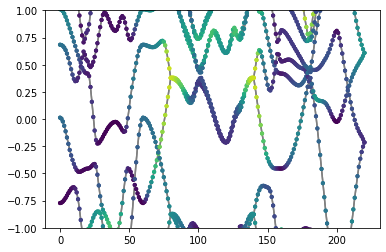

In [24]:
# code to generate plot seperately
plt.clf()
npts, nwan = vals.shape
x=np.array(range(npts))
X = np.tile(x.T, (nwan,1)).T
plt.plot(vals, color="gray", zorder=1)
plt.ylim([-1,1])
plt.scatter(X, vals, s=10, c=projs_metal, zorder=2)


We can also run the entire example like this.

In [ ]:
! python3 example.py tate4_relaxed 

ham_ops
initializing wan_ham

 written on 11Dec2021 at 07:23:45 

147 2197
loaded  tate4_relaxed/qe_hr.dat
nwan:  68
nr:    2197

H size 13 13 13 68 68
done reshaping1
get_orbs  True
[['Ta', 2, ['d']], ['Te', 8, ['p']]]
nwan =  68
get_orbs  True
[['Ta', 2, ['d']], ['Te', 8, ['p']]]
nwan =  68
nktot 551

nktot 551

kpoint name_info
[[0, '$\\Gamma$'], [50, 'X'], [100, 'M'], [150, '$\\Gamma$'], [200, 'Z'], [250, 'R'], [300, 'A'], [350, 'Z'], [400, 'X'], [450, 'R'], [500, 'M'], [550, 'A']]

np.sum pvals  34560.00000461936
DOS BAND GAP  0.012991905212402344      -0.0047779083251953125   0.008213996887207031
np.sum(dos)  62.18677131903402
np.sum(pdos)  19.341539314169943
np.sum pvals  82944.00002908707
DOS BAND GAP  0.012991905212402344      -0.0047779083251953125   0.008213996887207031
np.sum(dos)  62.18677131903402
np.sum(pdos)  42.845232023069784
Traceback (most recent call last):
  File "example.py", line 108, in <module>
    IMAGE, VALS, points = ops.fermi_surf_2d(h, fermi, [-0.5,0.0, -

In [ ]:
! ls

band_struct_metal_faster_tate4_relaxed.pdf
band_struct_metal_tate4_relaxed.pdf
band_struct_tate4_relaxed.pdf
DOS_energies_tate4_relaxed.csv
DOS_metal_tate4_relaxed.pdf
DOS_pdos_metal_tate4_relaxed.csv
DOS_pdos_te_tate4_relaxed.csv
DOS_proj_grid_metal_tate4_relaxed.npy
DOS_proj_grid_te_tate4_relaxed.npy
DOS_te_tate4_relaxed.pdf
DOS_tot_tate4_relaxed.csv
DOS_vals_grid_tate4_relaxed.npy
example.py
ham_ops.py
nbte4_relaxed
proj_bandstruct_metal_tate4_relaxed.csv
proj_bandstruct_te_tate4_relaxed.csv
__pycache__
qe.in
reference
tate4_expt_coords
tate4_relaxed
vals_bandstruct_tate4_relaxed.csv
wan_ham.py
